In [82]:
import sys

sys.path.append('../gtm/')
sys.path.append('../src/')

In [83]:
import importlib
%matplotlib inline
import matplotlib.pyplot as plt
import collections
import pickle
import numpy as np

from random import random

import torch
import pandas as pd

import sim_lda
importlib.reload(sim_lda)
from sim_lda import *

import sim_utils
importlib.reload(sim_utils)
from sim_utils import *

import simulation
importlib.reload(simulation)
from simulation import *

### picking up one dirichlet_mlp/sage model

In [84]:
def _rearange_estimated_df(
        df,
        corres_num_topic_dict,
        dist_type,
    ):
    """
    inner function for rearanging an estimated matrix referencing the true matrix
    """
    if dist_type == "doc_topic":
        reanged_df = df.loc[:, corres_num_topic_dict.values()]
        reanged_df.columns = corres_num_topic_dict.keys()
    else:
        reanged_df = df.loc[corres_num_topic_dict.values(), :]
        reanged_df.index = corres_num_topic_dict.keys()

    return reanged_df

with open("../data/gtm/df_doc_topic_dirichlet_mlp.pickle","rb") as f:
    df_doc_topic_gtm = pickle.load(f)
with open("../data/gtm/true_df_doc_topic_dirichlet_mlp.pickle","rb") as f:
    true_df_doc_topic_gtm = pickle.load(f)
with open("../data/gtm/df_topic_word_dirichlet_mlp.pickle","rb") as f:
    df_topic_word_gtm = pickle.load(f)
with open("../data/gtm/true_df_topic_word_dirichlet_mlp.pickle","rb") as f:
    true_df_topic_word_gtm = pickle.load(f)
with open("../data/gtm/df_doc_topic_dirichlet_sage.pickle","rb") as f:
    df_doc_topic_gtm2 = pickle.load(f)
with open("../data/gtm/true_df_doc_topic_dirichlet_sage.pickle","rb") as f:
    true_df_doc_topic_gtm2 = pickle.load(f)
with open("../data/gtm/df_topic_word_dirichlet_sage.pickle","rb") as f:
    df_topic_word_gtm2 = pickle.load(f)
with open("../data/gtm/true_df_topic_word_dirichlet_sage.pickle","rb") as f:
    true_df_topic_word_gtm2 = pickle.load(f)

with open("../data/lda/df_doc_topic.pickle","rb") as f:
    df_doc_topic_lda = pickle.load(f)
with open("../data/lda/true_df_doc_topic.pickle","rb") as f:
    true_df_doc_topic_lda = pickle.load(f)
with open("../data/lda/df_topic_word.pickle","rb") as f:
    df_topic_word_lda = pickle.load(f)
with open("../data/lda/true_df_topic_word.pickle","rb") as f:
    true_df_topic_word_lda = pickle.load(f)

### matching topics by hungarian algrithm (by dot_product)

In [85]:
corres_num_topic_dict_gtm = matching_topic(model_type="gtm", matching_by="dot_product",doc_topic_prior="dirichlet",decoder_type="mlp")
corres_num_topic_dict_gtm2 = matching_topic(model_type="gtm", matching_by="dot_product",doc_topic_prior="dirichlet",decoder_type="sage")
corres_num_topic_dict_lda = matching_topic(model_type="lda", matching_by="dot_product",)

reanged_df_doc_topic_gtm = _rearange_estimated_df(
        df_doc_topic_gtm,
        corres_num_topic_dict_gtm,
        dist_type="doc_topic")
reanged_df_doc_topic_gtm2 = _rearange_estimated_df(
        df_doc_topic_gtm2,
        corres_num_topic_dict_gtm2,
        dist_type="doc_topic")
reanged_df_doc_topic_lda = _rearange_estimated_df(
        df_doc_topic_lda,
        corres_num_topic_dict_lda,
        dist_type="doc_topic")

reanged_df_topic_word_gtm = _rearange_estimated_df(
        df_topic_word_gtm,
        corres_num_topic_dict_gtm,
        dist_type="topic_word")
reanged_df_topic_word_gtm2 = _rearange_estimated_df(
        df_topic_word_gtm2,
        corres_num_topic_dict_gtm2,
        dist_type="topic_word")
reanged_df_topic_word_lda = _rearange_estimated_df(
        df_topic_word_lda,
        corres_num_topic_dict_lda,
        dist_type="topic_word")

### doc_topic_dist per topic
- mlp
- sage
- lda

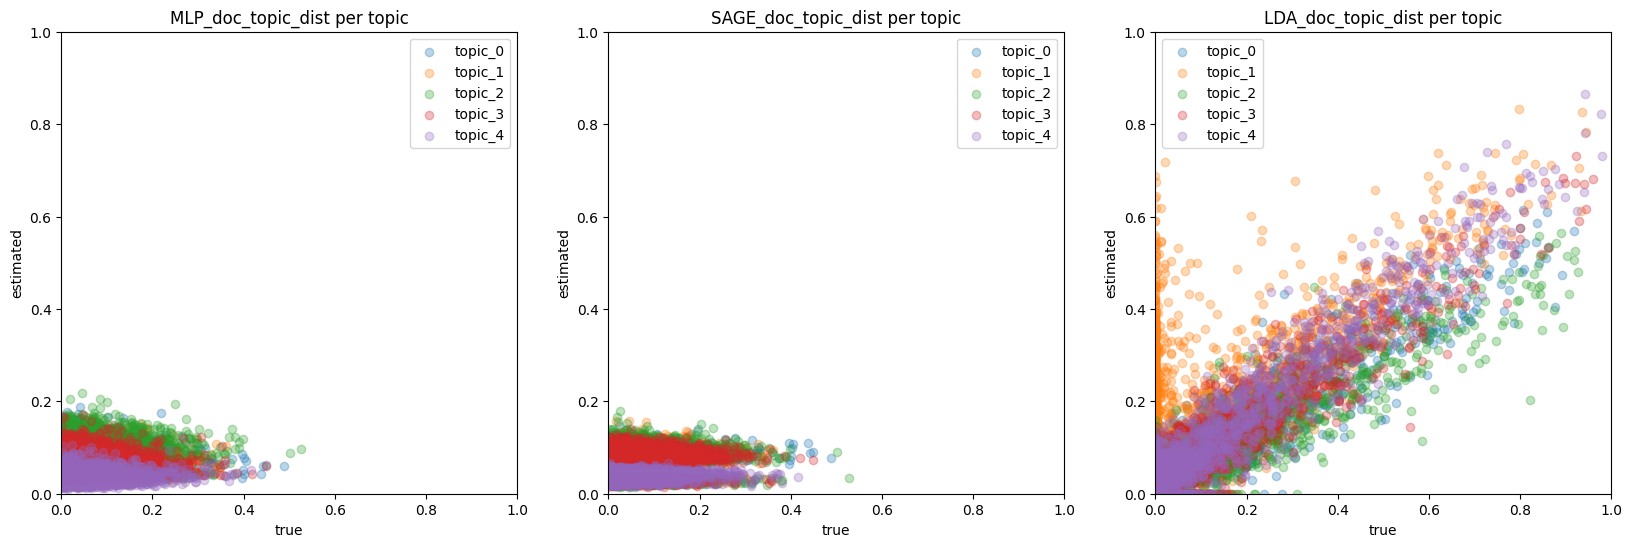

In [90]:
fig = plt.figure(figsize=(20,6),facecolor="white")
ax1 = fig.add_subplot(1, 3, 1,xlabel="true", ylabel="estimated")
ax2 = fig.add_subplot(1, 3, 2, xlabel="true", ylabel="estimated")
ax3 = fig.add_subplot(1, 3, 3, xlabel="true", ylabel="estimated")

ax1.set_title("MLP_doc_topic_dist per topic")
for i in range(20):
    true_series = true_df_doc_topic_gtm.iloc[:,i]
    estimates_series = reanged_df_doc_topic_gtm.iloc[:,i]
    ax1.scatter(true_series,estimates_series,label="topic_{}".format(i),alpha=0.3)
    ax1.set_xlim([0,1])
    ax1.set_ylim([0,1])
    ax1.legend()
    if i == 4:
        break

ax2.set_title("SAGE_doc_topic_dist per topic")
for i in range(20):
    true_series = true_df_doc_topic_gtm2.iloc[:,i]
    estimates_series = reanged_df_doc_topic_gtm2.iloc[:,i]
    ax2.scatter(true_series,estimates_series,label="topic_{}".format(i),alpha=0.3)
    ax2.set_xlim([0,1])
    ax2.set_ylim([0,1])
    ax2.legend()
    if i == 4:
        break

ax3.set_title("LDA_doc_topic_dist per topic")
for i in range(20):
    true_series = true_df_doc_topic_lda.iloc[:,i]
    estimates_series = reanged_df_doc_topic_lda.iloc[:,i]
    ax3.scatter(true_series,estimates_series,label="topic_{}".format(i),alpha=0.3)
    ax3.set_xlim([0,1])
    ax3.set_ylim([0,1])
    ax3.legend()
    if i == 4:
        break

### topic_word_dist per topic
- mlp
- sage
- lda

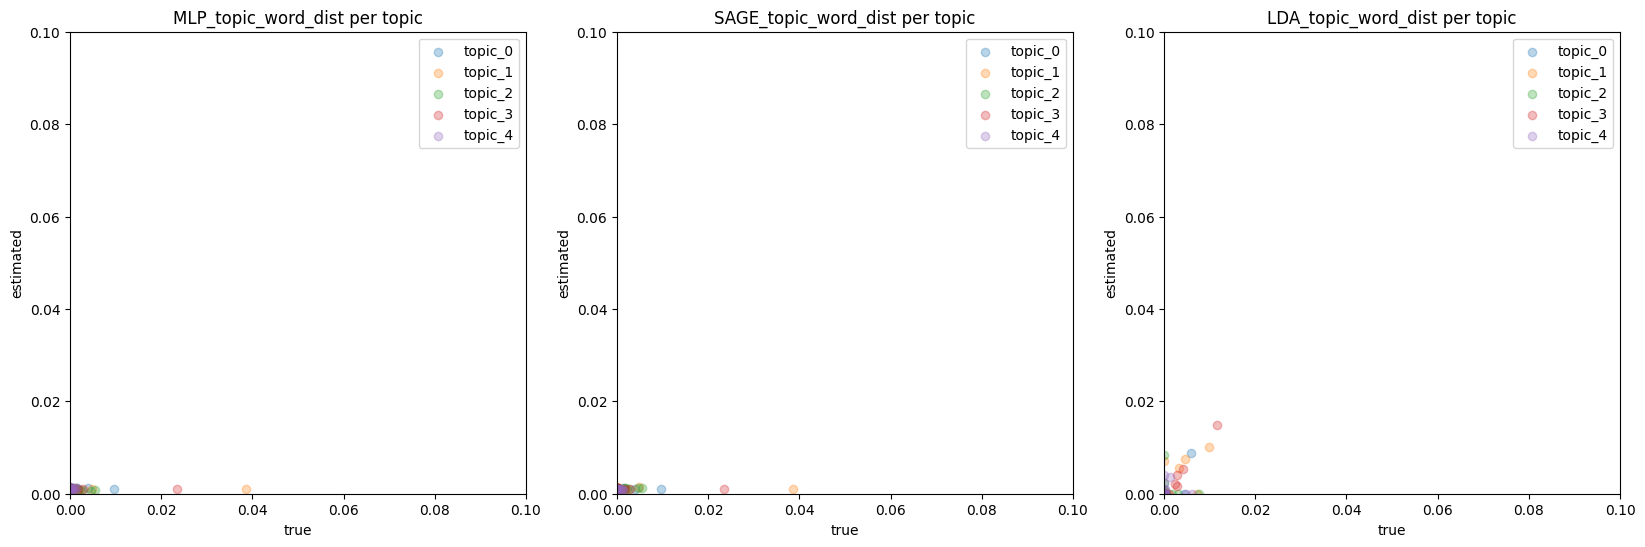

In [87]:
fig = plt.figure(figsize=(20,6),facecolor="white")
ax1 = fig.add_subplot(1, 3, 1,xlabel="true", ylabel="estimated")
ax2 = fig.add_subplot(1, 3, 2, xlabel="true", ylabel="estimated")
ax3 = fig.add_subplot(1, 3, 3, xlabel="true", ylabel="estimated")

ax1.set_title("MLP_topic_word_dist per topic")
for i in range(20):
    true_series = true_df_topic_word_gtm.iloc[:,i]
    estimates_series = reanged_df_topic_word_gtm.iloc[:,i]
    ax1.scatter(true_series,estimates_series,label="topic_{}".format(i),alpha=0.3)
    ax1.set_xlim([0,.1])
    ax1.set_ylim([0,.1])
    ax1.legend()
    if i == 4:
        break

ax2.set_title("SAGE_topic_word_dist per topic")
for i in range(20):
    true_series = true_df_topic_word_gtm2.iloc[:,i]
    estimates_series = reanged_df_topic_word_gtm2.iloc[:,i]
    ax2.scatter(true_series,estimates_series,label="topic_{}".format(i),alpha=0.3)
    ax2.set_xlim([0,.1])
    ax2.set_ylim([0,.1])
    ax2.legend()
    if i == 4:
        break

ax3.set_title("LDA_topic_word_dist per topic")
for i in range(20):
    true_series = true_df_topic_word_lda.iloc[:,i]
    estimates_series = reanged_df_topic_word_lda.iloc[:,i]
    ax3.scatter(true_series,estimates_series,label="topic_{}".format(i),alpha=0.3)
    ax3.set_xlim([0,.1])
    ax3.set_ylim([0,.1])
    ax3.legend()
    if i == 4:
        break